# Introduction to Machine Learning

In a nutshell, Machine Learning (ML) is the field that studies algorithms that automatically learn to perform tasks based on experience. In general, ML algorithms learn patterns from data and use these patterns to produce meaningful output. Throughout this course, we will experiment with several of these algorithms.

As a starting step, let's look at maybe the simplest form of ML algorithms: supervised learning.

This lecture is based on [Josh Gordon's ML recipes](https://www.youtube.com/playlist?list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal).

## Agenda
 - What is supervised learning
 - Preparing data
 - Training a classifier
 - Evaluating the classifier
 - Classifying Security Vulnerabilities


# What is supervised learning

**Supervised learning models** learn to perform a task by observing manually created examples. For example, by observing several pictures of cats and dogs, a supervised learning algorithm learns to tell if the animal on a new picture is either a cat or dog. In this case, we are training a **classification** model, that is, a model that learns to assign classes to data points.

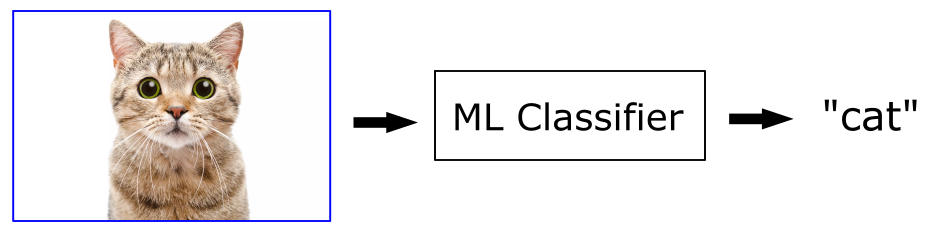


In this assignment, we will focus on classification models.

# Fruit classifier

<img src="https://github.com/tproffen/ORCSGirlsPython/blob/master/MachineLearning/Images/apple-orange.jpg?raw=1" width="25%" align="right" hpsace="10">

We will write a fruit classifier program that can distinguish between apples and oranges based on weight and smoothness of the their surface. 

We have a list of weights and surface smoothness values labelled with the correct fruit. From this data set, the computer will learn and then classify.


In [ ]:
# Let's download our dataset
!wget "https://homepages.dcc.ufmg.br/~arturluis/202ds/fruits.csv" --no-check-certificate -nc

File ‘fruits.csv’ already there; not retrieving.



## Reading training data

First we need to read the *labeled* data we want to learn from. In this example we used *supervised machine learning*, so we need to have a data set containing inputs as well as the correct label. Let's read the data and have a look. Hit `shift+enter` in the next cell.

In [ ]:
# Reading the data
import pandas as pd
data = pd.read_csv('fruits.csv')

# Showing the first 5 lines of data on the screen
data.head(5)

,Unnamed: 0,Weight,Surface,Fruit
0,0,144.533160,0.829955,0
1,1,149.921747,0.604190,0
2,2,148.834463,0.878738,0
3,3,139.184578,0.695882,0
4,4,150.781653,0.771810,0


Our training dataset comprises `Weight`, `Surface`, and `Fruit`.
`Weight` contains the weight of the fruit; and `Surface` tells us if the surface of the fruit is *smooth* (high value) or *rough* (low value). These two columns we call **inputs** as they later are the inputs we used to classify an unknown fruit. The last column, `Fruit`, is the label. So, in this dataset, we already *know* the corresponding fruit - encoded **0** for **Apple** and **1** for **Orange**. (That's why we call it training set, right?)

## Experiment Setup

Next we need to split our dataset into inputs (columns `Weight` and `Surface`) and labels (column `Fruit`). The next command  splits the inputs and labels. Besides, the command selects 20% of the data at random and sets them aside as test data set. The model will not see this data during training. We will use it later to check our model. You can read more about the difference between training and test sets and why we need them [here](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6).

In [ ]:
from sklearn import model_selection
# Preparing data and create training and test inputs and labels
inputs_train, inputs_test, labels_train, labels_test = \
       model_selection.train_test_split(data[['Weight', 'Surface']].values, data['Fruit'].values, test_size=0.2)

print("Training set size:", inputs_train.shape)
print("Test set size:", inputs_test.shape)

Training set size: (160, 2)
Test set size: (40, 2)


## Visualizing the data

Now that we have the data, it is always good to visualize them. This is easy in case of just two inputs and can become rather challenging for complex data sets.

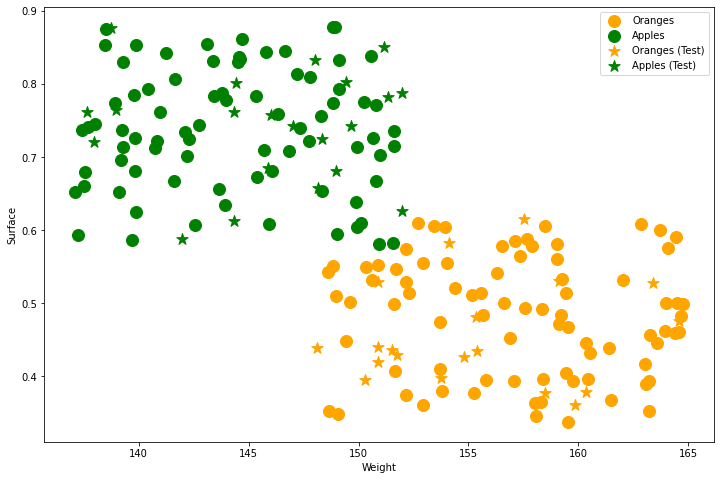

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 12

# Plotting data
plt.figure(figsize=(12, 8))

plt.scatter(inputs_train[labels_train==1, 0], inputs_train[labels_train==1, 1], c='orange',  label='Oranges')
plt.scatter(inputs_train[labels_train==0, 0], inputs_train[labels_train==0, 1], c='green', label='Apples')
plt.scatter(inputs_test[labels_test==1, 0], inputs_test[labels_test==1, 1], c='orange',  label='Oranges (Test)',  marker='*')
plt.scatter(inputs_test[labels_test==0, 0], inputs_test[labels_test==0, 1], c='green', label='Apples (Test)', marker='*')

plt.xlabel('Weight')
plt.ylabel('Surface')
plt.legend()
plt.show()

## Training

Now we are ready to train. As you heard already, there are many different training models. We specify `SVM` as our classifier and then simple call `fit` using our inputs and label arrays. 

### A short SVM overview
SVM is a supervised learning algorithm that learns to separate classes by drawing a decision boundary. The goal of SVM is to find the boundary that best separates the different classes in the training set. There are several ways to decide what this decision boundary looks like. In this assignment, we will use the simplest decision boundary: a linear boundary. You can read more about SVMs [here](https://towardsdatascience.com/the-complete-guide-to-support-vector-machine-svm-f1a820d8af0b).

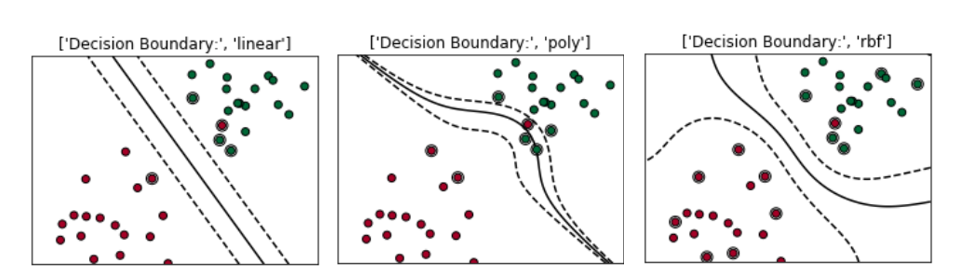

We will use Scikit-Learn's implementation of the SVM Classifier ("SVC") and train it with our training set.

In [ ]:
from sklearn.svm import SVC

# Selecting the classifier we want to use
svm = SVC(kernel="linear")

# Learning (or training our model) based on inputs and labels from our dataset
svm.fit(inputs_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Note that the `kernel` parameter controls how SVM creates the decision boundary.

## Using the model to classify

So now we have our trained model. Let us explore how well it works. We can play aroud with the new input, by changing the values for weight and surface, and then watch which fruit the model thinks it is. 

In [ ]:
# INPUT: enter weight and surface value for a imaginary and unknown fruit
weight  = 160
surface = 0.3

# Use our model to predict which fruit this is
fruit_type = svm.predict([[weight, surface]])
fruit_type = "orange" if fruit_type == 1 else "apple"
print (fruit_type)

orange


## Evaluating the model

Now we use the test set to evaluate our model. Precisely, we classify the test input using our model and then match the classifications against the test labels. 


### Accuracy

The simplest metric we use to evaluate the quality of our model is the **accuracy**. Basically, we compare the model's classification to the ground-truth labels and count how many classification the model got right. The result is given as the percentage of correctly labeled fruits.

In [ ]:
from sklearn.metrics import accuracy_score

# Classify what the fruits are based on the test data
classifications = svm.predict(inputs_test)

# Print the score on the test data
print("SVM Test Set Score:")
print(accuracy_score(labels_test, classifications)*100)

SVM Test Set Score:
92.5


### Confusion Matrix

A more detailed way to evaluate the performance of a classifier is to look at the confusion matrix. 

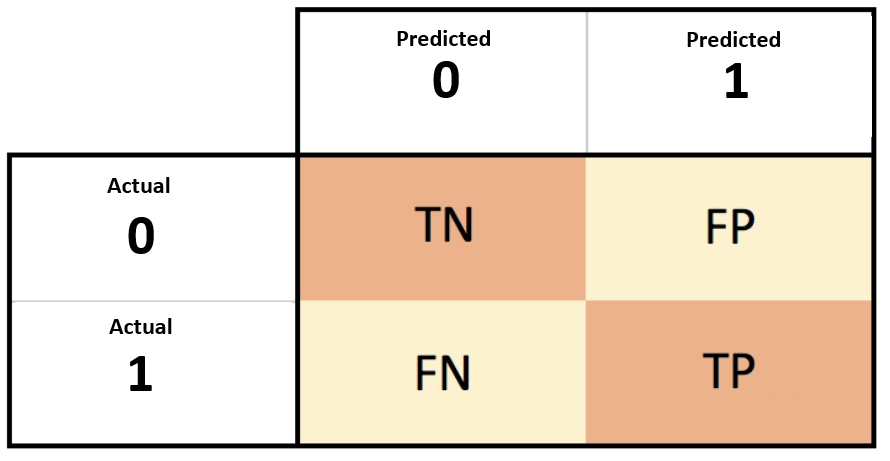

Let's compute the Confusion Matrix for our application

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels_test, classifications)

array([[19,  2],
       [ 1, 18]])

### Precision and Recall
The following metrics can be calculated from the confusion matrix

> $precision = \frac{TP}{(TP + FP)}$

> $recall = \frac{TP}{(TP + FN)}$

These metrics can be seen as the answers to these questions:

> $precision = $ out of all the samples assigned class 1, how many really belonged to class 1?

> $recall = $ out of all samples in class 1, how many did the model correctly classify?

These metrics can be computed separately for each class or averaged for all classes.

In [ ]:
from sklearn.metrics import precision_score, recall_score

print('Precision:', '{:0.2f}'.format(precision_score(labels_test, classifications)))
print('Recall:', '{:0.2f}'.format(recall_score(labels_test, classifications)))

Precision: 0.90
Recall: 0.95


# Lab: Classifying security vulnerabilities

Now let's train a classifier to classify security vulnerabilities according to their CVSS severity class. The dataset provided below contains the CVSS features and severity for all of the vulnerabilities reported in 2020. The vulnerabilities are separated in four severity classes:

- 0 = 'LOW'
- 1 = 'MIDDLE'
- 2 = 'HIGH'
- 3 = 'CRITICAL'


In [ ]:
# Download the dataset
!wget "https://homepages.dcc.ufmg.br/~arturluis/202ds/2020cvss.csv" --no-check-certificate -nc

# Read it and print the first five rows
cvss_data = pd.read_csv('2020cvss.csv')
cvss_data.head()

File ‘2020cvss.csv’ already there; not retrieving.



,Unnamed: 0,attackVector,attackComplexity,privilegesRequired,userInteraction,confidentialityImpact,integrityImpact,availabilityImpact,label
0,0,0.55,0.44,0.62,0.85,0.66,0.66,0.66,2
1,1,0.85,0.44,0.85,0.62,0.66,0.66,0.66,2
2,2,0.55,0.77,0.62,0.62,0.66,0.66,0.66,1
3,3,0.55,0.44,0.62,0.85,0.00,0.00,0.66,1
4,4,0.55,0.44,0.27,0.85,0.66,0.66,0.66,1


In this dataset we have seven features, corresponding to fields used to compute the CVSS score and severity:
- Attack Vector
- Attack Complexity
- Privileges Required
- User Interaction
- Confidentiality Impact
- Integrity Impact
- Availability Impact

Note that the features in the dataset were converted to a numerical score representation, following the [CVSS score metrics](https://www.first.org/cvss/specification-document). We have to do this conversion because the SVM algorithm expects numbers as input.

Now it's your turn, use this dataset to train and evaluate a SVM classifier that learns to classify the severity of a vulnerability based on its CVSS features. The steps for this are outlined in the cell below, we have already split the data into training and test for you, fill the remaining gaps with your code. 


Important! Before you start, create a copy of this notebook to your google drive and work on your copy.

Once you are done, submit your solutions here: https://forms.gle/DDpGDkjNQWFgJvky8



In [ ]:
#### Split dataset into training and testing sets
inputs_train, inputs_test, labels_train, labels_test = model_selection.train_test_split(
      cvss_data[["attackVector", "attackComplexity", "privilegesRequired", "userInteraction", "confidentialityImpact", "integrityImpact", "availabilityImpact"]].values,
      cvss_data['label'].values,
      test_size=0.2
    )

### Fit the SVM classifier
# TODO

### Try out your classifier using the vulnerability below:
vulnerability = [[0.85, 0.44, 0.27, 0.85, 0.66, 0.  , 0.  ]]
# TODO

### Use your classifier to classify the test set
# TODO

### Compute the final accuracy, precision, and recall on the test set
# tip: use sklearn's "macro" averaging to compute precision and recall
# TODO

### Finally, compute the confusion matrix for the testing set
# TODO